# Reading from example SITL CSV and sourcing relevant data

The code does two things:

- Puts an SITL report into a basic DataFrame.
- Extracts an "event" (BBF) from the report, loads the MMS data and plots the relevant time frame.

In [1]:
# Just to get rid of IPython deprecation warnings:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# std lib imports
import os
import datetime as dt
# 3rd party imports
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# local pkg imports
import pyspedas # as spds
import pytplot

# MeMes package imports:
import retrieve_sitl

#### Read the data using get()

This returns all the data, sorted but otherwise unchanged.

In [2]:
pickle_path = "../pydata/reports_df.p"
if os.path.exists(pickle_path):
    print("Reading pickle data")
    reports_df = pd.read_pickle(pickle_path)
else:
    print("Downloading data from source. This will take some minutes...")
    reports_df = retrieve_sitl.get()
    # Pickle the data for quicker loading because reading it takes forever:
    reports_df.to_pickle(pickle_path)

Reading pickle data


In [3]:
reports_df.head(50)

,datetime,FOM,ID,Discussion
0,2016-04-05/13:32:14 - 2016-04-05/13:35:54,20.0,jholmes(EVA),Continuation past crossing with some B rotati...
1,2016-04-05/13:43:24 - 2016-04-05/13:45:34,14.0,jholmes(EVA),Near boundary with B-field activity
2,2016-04-05/13:45:34 - 2016-04-05/13:47:54,8.0,jholmes(EVA),"E-field spikes, possible waves"
3,2016-04-05/13:48:24 - 2016-04-05/13:50:54,17.0,jholmes(EVA),"Strong E and B activity, ion flow reversal. B..."
4,2016-04-05/17:05:04 - 2016-04-05/17:07:04,18.0,jholmes(EVA),"Boundary skim, density gradient, E-field sign..."
5,2016-04-05/17:07:04 - 2016-04-05/17:09:04,18.0,jholmes(EVA),"Boundary skim, density gradient, E-field sign..."
6,2016-04-05/17:09:04 - 2016-04-05/17:11:04,18.0,jholmes(EVA),"Boundary skim, density gradient, E-field sign..."
7,2016-04-05/17:23:04 - 2016-04-05/17:24:24,15.0,jholmes(EVA),"Density, B gradients, E-field activity"
8,2016-04-05/20:23:54 - 2016-04-05/20:26:34,15.0,jholmes(EVA),"Gradual boundary crossing, Large density change"
9,2016-04-05/20:26:34 - 2016-04-05/20:29:14,17.0,jholmes(EVA),"Continued boundary crossing, B-field activity"


#### Parse the data so it's easier to work with

Split the datetime objects and combine all rows with identical discussions into one (while keeping the relevant start times and end times).

Add FOM field as new FLOAT column, add boolean fields for string searches for 'BBF' and 'DF'.

TODO: Add duration field calculated from datetime/Starttime/Endtime

In [4]:
reports_df = retrieve_sitl.parse_times(reports_df)
reports_df = reports_df.drop(columns='datetime') # Don't re-run this cell
reports_df = retrieve_sitl.combine_rows(reports_df)
# More parsing
reports_df['FOM_float'] = reports_df['FOM'].astype(float) # Add FOM as float for query operations
reports_df['Discussion_contains_BBF'] = False #Create boolean field for BBF, initially set as False
reports_df['Discussion_contains_DF'] = False #Create boolean field for DF, initially set as False

mask_BBF = reports_df.Discussion.str.contains('BBF',case=False) #Create mask, string search case insensitive for 'BBF'
mask_DF = reports_df.Discussion.str.contains('DF',case=False) #Create mask, string search case insensitive for 'DF'

reports_df.loc[mask_BBF,'Discussion_contains_BBF'] = True #Set rows from mask equal to True
reports_df.loc[mask_DF,'Discussion_contains_DF'] = True #Set rows from mask equal to True

#reports_df['Discussion_contains_BBF'].iloc[18883] == True #Evaluate example for 'BBF' == TRUE
#reports_df['Discussion_contains_BBF'].iloc[2] == False #Evaluate example for no 'BBF' == FALSE

reports_df.head(50)

,FOM,ID,Discussion,Starttime,Endtime,Day,FOM_float,Discussion_contains_BBF,Discussion_contains_DF
0,20.0,jholmes(EVA),Continuation past crossing with some B rotati...,2016-04-05 13:32:14,2016-04-05 13:35:54,2016-04-05,20.0,False,False
1,14.0,jholmes(EVA),Near boundary with B-field activity,2016-04-05 13:43:24,2016-04-05 13:45:34,2016-04-05,14.0,False,False
2,8.0,jholmes(EVA),"E-field spikes, possible waves",2016-04-05 13:45:34,2016-04-05 13:47:54,2016-04-05,8.0,False,False
3,17.0,jholmes(EVA),"Strong E and B activity, ion flow reversal. B...",2016-04-05 13:48:24,2016-04-05 13:50:54,2016-04-05,17.0,False,False
4,18.0,jholmes(EVA),"Boundary skim, density gradient, E-field sign...",2016-04-05 17:05:04,2016-04-05 17:11:04,2016-04-05,18.0,False,False
5,15.0,jholmes(EVA),"Density, B gradients, E-field activity",2016-04-05 17:23:04,2016-04-05 17:24:24,2016-04-05,15.0,False,False
6,15.0,jholmes(EVA),"Gradual boundary crossing, Large density change",2016-04-05 20:23:54,2016-04-05 20:26:34,2016-04-05,15.0,False,False
7,17.0,jholmes(EVA),"Continued boundary crossing, B-field activity",2016-04-05 20:26:34,2016-04-05 20:29:14,2016-04-05,17.0,False,False
8,12.0,jholmes(EVA),"Boundary skimming. density gradient, E and B ...",2016-04-05 20:32:54,2016-04-05 20:35:54,2016-04-05,12.0,False,False
9,5.0,jholmes(EVA),Interesting ion populations near boundary,2016-04-05 20:35:54,2016-04-05 20:39:24,2016-04-05,5.0,False,False


In [5]:
#Example query for finding a "high quality"? BBF
reports_df.query('FOM_float > 160 & Discussion_contains_BBF == True')

,FOM,ID,Discussion,Starttime,Endtime,Day,FOM_float,Discussion_contains_BBF,Discussion_contains_DF
4989,200.0,lavanov(EVA),"FPI is on, svereal DP/BBF and flow reversals",2017-04-24 07:08:03,2017-04-24 08:08:03,2017-04-24,200.0,True,False
5175,170.0,ykhotyaintsev(EVA),sharp DF and BBF,2017-05-25 04:39:33,2017-05-25 04:41:23,2017-05-25,170.0,True,True
5208,180.0,ykhotyaintsev(EVA),BBF,2017-05-28 04:09:33,2017-05-28 04:18:13,2017-05-28,180.0,True,False
5209,180.0,ykhotyaintsev(EVA),BBF,2017-05-28 04:18:13,2017-05-28 04:41:33,2017-05-28,180.0,True,False
6643,168.0,kgenestreti(EVA),"BBF, flow reversal, B to zero, current",2017-08-18 17:06:43,2017-08-18 17:14:43,2017-08-18,168.0,True,False
16201,170.0,ykhotyaintsev(EVA),"BBF Vx>500 km/s, multiple DFs",2019-09-14 07:24:23,2019-09-14 07:30:13,2019-09-14,170.0,True,True


#### Find an example BBF to extract and plot

In [6]:
reports_df.loc[reports_df.Discussion.str.contains('BBF',case=False)]

,FOM,ID,Discussion,Starttime,Endtime,Day,FOM_float,Discussion_contains_BBF,Discussion_contains_DF
625,40.0,musanova(EVA),"BBFs, dipolarization front, energetic partic...",2016-05-22 09:03:34,2016-05-22 10:02:54,2016-05-22,40.0,True,False
629,40.0,musanova(EVA),"dipolarization front, BBFs, energetic partic...",2016-05-23 08:58:04,2016-05-23 09:16:34,2016-05-23,40.0,True,False
633,40.0,musanova(EVA),"BBFs, plasmasheet thinning, wave activity, en...",2016-05-24 05:50:34,2016-05-24 07:05:04,2016-05-24,40.0,True,False
637,40.0,musanova(EVA),"Dipolarization front, BBFs, energetic particl...",2016-05-25 03:57:54,2016-05-25 04:34:44,2016-05-25,40.0,True,False
639,30.0,musanova(EVA),"Dipolarization front, BBFs, waves, injections",2016-05-25 17:20:54,2016-05-25 17:34:04,2016-05-25,30.0,True,False
...,...,...,...,...,...,...,...,...,...
18881,120.0,tphan(EVA),BBF/PSBL,2020-07-11 18:47:33,2020-07-11 18:50:33,2020-07-11,120.0,True,False
18882,120.0,tphan(EVA),3 BBFs,2020-07-11 19:04:13,2020-07-11 19:47:23,2020-07-11,120.0,True,False
18883,110.0,tphan(EVA),BBF,2020-07-11 19:45:13,2020-07-11 20:48:23,2020-07-11,110.0,True,False
18884,110.0,tphan(EVA),2 long BBFs,2020-07-11 21:22:33,2020-07-11 21:49:13,2020-07-11,110.0,True,False


In [10]:
# Take an example from dataframe:
n_event = 18881    # pick index of example event (data needs to exist!)
test_event = reports_df.loc[n_event]
description = test_event['Discussion']
starttime = test_event['Starttime']
endtime = test_event['Endtime']

# Extract dates of data we'll need for event:
trange = [(starttime - dt.timedelta(days=1)).strftime('%Y-%m-%d'), 
          (endtime + dt.timedelta(days=1)).strftime('%Y-%m-%d')]
plt_tlims = (starttime - dt.timedelta(minutes=15),
             endtime + dt.timedelta(minutes=15))
print("Using range of dates:", [starttime, endtime])

Using range of dates: [Timestamp('2020-07-11 18:47:33'), Timestamp('2020-07-11 18:50:33')]


## Read MMS data

Run the first block to download the data - if you've already downloaded the data, ignore it!. The following blocks will read the downloaded files using either CDFLIB or (below) pyspedas. CDFLIB is far faster!

In [11]:
# ----------------------------------------------
# RUN THIS BLOCK TO DOWNLOAD DATA TO LOCAL PATH
# ----------------------------------------------

# update local data dir if using no_update flag
pyspedas.mms.mms_config.CONFIG['local_data_dir'] = '../pydata'

# load B-field data from FGM (Fluxgate Magnetometer)
# use no_update=True to load local data
fgm_vars = pyspedas.mms.fgm(
    trange       =  trange,
    time_clip    =   False, # could truncate residuals at trange ends
    data_rate    =  'srvy', # survey frequency
    level        =    'l2', # ensure L2 products
    probe        =     '1', # could be ['1','2','3','4'] for all spacecraft
    no_update    =    True, # load local data
)

26-Aug-20 14:11:57: Searching for local files...


Loading: ../pydata/mms1/fgm/srvy/l2/2020/07/mms1_fgm_srvy_l2_20200711_v5.254.0.cdf
Loading: ../pydata/mms1/fgm/srvy/l2/2020/07/mms1_fgm_srvy_l2_20200711_v5.254.0.cdf
Loaded variables:
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
mms1_fgm_r_gse_srvy_l2
mms1_fgm_r_gsm_srvy_l2
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1_fgm_rdeltahalf_srvy_l2


#### Read using CDF library (fast)

Reads data within the time range (plt_tlims here) specified, assuming that the files exist locally under the path base_path.

In [12]:
import retrieve_mms

local_data_dir = '../pydata'
base_path = os.path.join(local_data_dir, 'mms1', 'fgm', 'srvy', 'l2')
data = retrieve_mms.get_fgm(base_path, plt_tlims[0], plt_tlims[1])
t_utc, B_x, B_y, B_z, Bt = data

26-Aug-20 14:12:26: /Users/payette/HW_20/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Reading file at ../pydata/mms1/fgm/srvy/l2/2020/07/mms1_fgm_srvy_l2_20200711_v5.254.0.cdf


## Plot the data

Reading seems to have worked and has picked out the time of interesting signals, so let's plot...

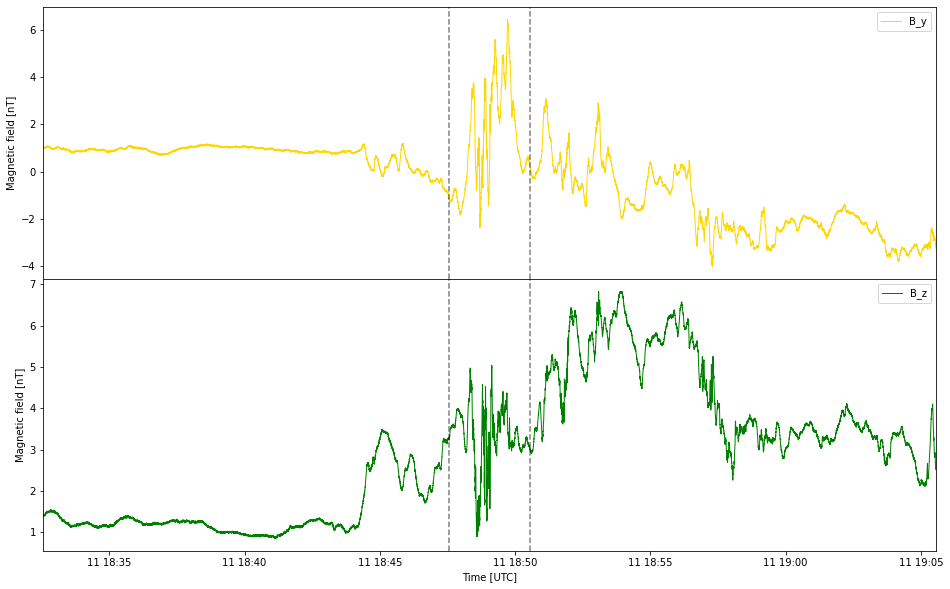

In [13]:
# convert to datetime axis
inds = np.where(np.logical_and(t_utc > plt_tlims[0], t_utc < plt_tlims[1]))

#----------------------------------------------------------------------
# plotting below
#----------------------------------------------------------------------

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,10), sharex=True)
ax1.plot_date(t_utc[inds], B_y[inds], '-', lw=1, c='gold', label='B_y')
ax2.plot_date(t_utc[inds], B_z[inds], '-', lw=1, c='green', label='B_z')
ax1.axvline(test_event['Starttime'], ls='--', c='k', alpha=0.5)
ax1.axvline(test_event['Endtime'], ls='--', c='k', alpha=0.5)
ax2.axvline(test_event['Starttime'], ls='--', c='k', alpha=0.5)
ax2.axvline(test_event['Endtime'], ls='--', c='k', alpha=0.5)
ax2.set_xlim(plt_tlims)
ax1.set_ylabel("Magnetic field [nT]")
ax2.set_ylabel("Magnetic field [nT]")
ax2.set_xlabel("Time [UTC]")
ax1.legend()
ax2.legend()
plt.subplots_adjust(hspace=0.)
plt.show()

#### Possible TODO -- after looking at this plot, we could have a manual write back to the SITL df to qualify this with a boolean as a confirmed event, that we'll want for the ML side, I think?

#### Old example: Read a single SITL report (example CSV) file

In [ ]:
# Read an example CSV file
sitl_df = pd.read_csv("../example/example_sitl_reports.csv", usecols=[0,1,2,3])

# Split the time column into start time and end time:
sitl_df[['STARTTIME','ENDTIME']] = sitl_df['START TIME - END TIME'].str.split(" - ", expand=True)
# Parse the time columns into datetime objects:
tformat_sitl = '%Y-%m-%d/%H:%M:%S'
sitl_df['STARTTIME'] = pd.to_datetime(sitl_df['STARTTIME'], format=tformat_sitl)
sitl_df['ENDTIME'] = pd.to_datetime(sitl_df['ENDTIME'], format=tformat_sitl)
# Remove the original time format:
sitl_df = sitl_df.drop(columns='START TIME          - END TIME')

sitl_df.head(15)

#### Old method: Load MMS data using pytplot (slow)

In [7]:
alldata = pytplot.get_data('mms1_fgm_b_gsm_srvy_l2')

# Extract data:
t = alldata[0]
B_x = alldata[1][:,0]
B_y = alldata[1][:,1]
B_z = alldata[1][:,2]
Bt = alldata[1][:,3]

t_utc = np.array([dt.datetime.utcfromtimestamp(i) for i in t])

26-Aug-20 13:12:20: Searching for local files...


Loading: ../pydata/mms1/fgm/srvy/l2/2016/05/mms1_fgm_srvy_l2_20160521_v4.40.0.cdf
Loading: ../pydata/mms1/fgm/srvy/l2/2016/05/mms1_fgm_srvy_l2_20160522_v4.40.0.cdf
Loading: ../pydata/mms1/fgm/srvy/l2/2016/05/mms1_fgm_srvy_l2_20160521_v4.40.0.cdf
Loading: ../pydata/mms1/fgm/srvy/l2/2016/05/mms1_fgm_srvy_l2_20160522_v4.40.0.cdf
The lengths of x and y do not match!
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
Loaded variables:
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
mms1_fgm_r_gse_srvy_l2
mms1_fgm_r_gsm_srvy_l2
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1_fgm_rdeltahalf_srvy_l2
